# Python for data science -- A quick show

---


My goal here is to show off a little:
* to write a bit of a presentation using Python packages to good effect
* to convince you that learning Python is a good use of your time
* to have a bit of fun, and reinforce my own skills.

---

## 1. Make some data

First, we `import` modules so we can access their functions and data types.

In [1]:
#I like to import my packages straight away.  
import numpy as np               # `as` shortens typing
import pandas as pd              # instead of typing `pandas.bla`
import matplotlib as mpl
import matplotlib.pyplot as plt  #  we get to type `pd.bla`

%config InlineBackend.figure_format = 'retina' # run on a retina mac

Let there be objects

In [2]:
a = [1,3,5,np.nan,6,8]  #np.nan is not-a-number, provided by numpy
pd.Series(a) #spits to screen, because didn't capture into a variable.  bad practice

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Make some dates

In [3]:
num_pts = 30
dates = pd.date_range('20171031', periods=num_pts) #sensible date format.  embrace it and finally be free
dates[1] #see below?  sensible

Timestamp('2017-11-01 00:00:00', freq='D')

In [4]:
temps = 75*np.cos(np.linspace(0.45, 1.3, num=num_pts)) + 4*(np.random.normal(0,2,num_pts)-0.5)
# see https://docs.scipy.org/doc/numpy-dev/reference/routines.random.html

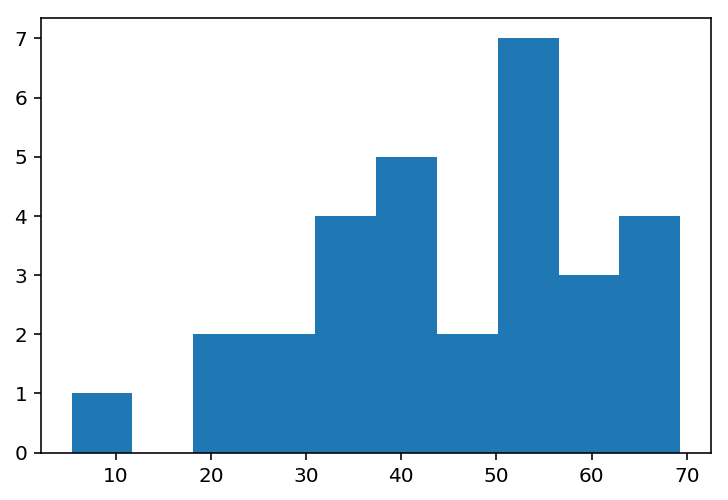

In [5]:
count, bins, ignored = plt.hist(temps)
plt.show()
#inline plots, yay!!!

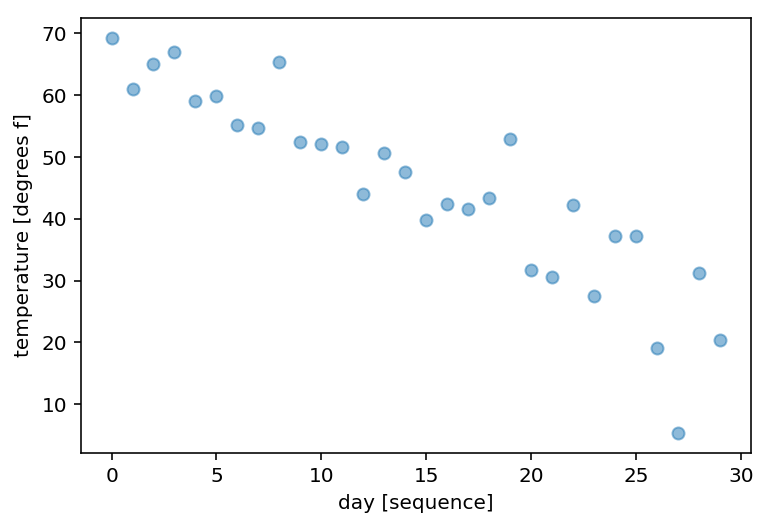

In [6]:
plt.scatter(range(num_pts), temps,   alpha=0.5)
plt.xlabel('day [sequence]')
plt.ylabel('temperature [degrees f]')
plt.show()

---

## 2. Using Pandas

[a nice tutorial on Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [28]:
predictions = pd.DataFrame({ 'Date' : dates, 'Temp' : temps})

In [29]:
predictions.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

This is wonderful!  Pandas is such a nice way to hold data in memory. It has beautiful summary views built right in.  Here's what we get if we just regurgitate `october_predictions` to the screen:

In [30]:
predictions.tail()

,Date,Temp
25,2017-11-25,37.273396
26,2017-11-26,19.119334
27,2017-11-27,5.382423
28,2017-11-28,31.253842
29,2017-11-29,20.455629


That is just so nice.  Wow.

In [31]:
predictions.sort_values(by='Temp', ascending=False).head()

,Date,Temp
0,2017-10-31,69.319971
3,2017-11-03,66.934221
8,2017-11-08,65.393137
2,2017-11-02,64.983307
1,2017-11-01,61.031679


The operation `sort_values` doesn't change `october_predictions at all`.  If you want it to be permanently sorted, you have to capture the result of the operation.

In [32]:
predictions.head()

,Date,Temp
0,2017-10-31,69.319971
1,2017-11-01,61.031679
2,2017-11-02,64.983307
3,2017-11-03,66.934221
4,2017-11-04,59.104915


In [33]:
mu, sigma = predictions.mean(), predictions.std()
print(mu)
print('\n')
print(mu[0])

Temp    45.256346
dtype: float64


45.2563464049


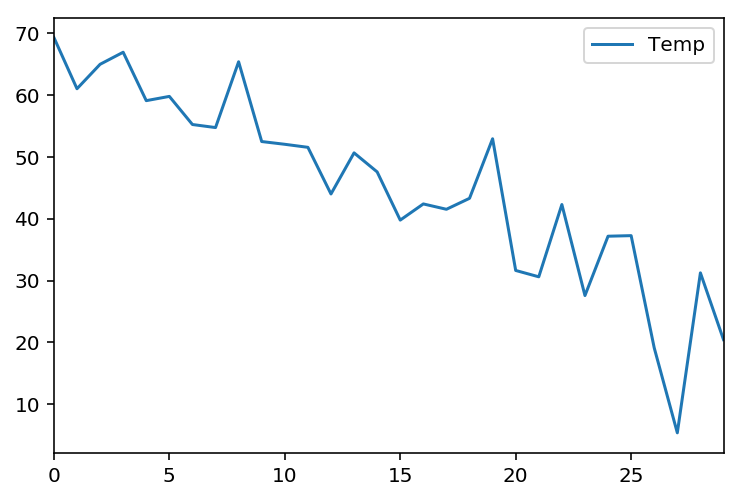

In [34]:
plt.figure(); predictions.plot(); plt.legend(loc='best'); plt.show()

In [37]:
predictions.to_csv('predictions.csv')
# save that data for later.  be a good scientist and save your data

---

## 3. Stuff and things

https://www.kaggle.com/gabrio/board-games-dataset/downloads/board-games-dataset.zip